<h1>BreadBasket: Selling Patterns</h1>
<h2>by Leo Wang</h2>

<h2><a class="anchor" id="introduction">Introduction</a></h2>

<p>The dataset belongs to "The Bread Basket" a bakery located in Edinburgh. The dataset has 21293 entires, over 6000 transactions and 4 columns:</p>
<ul>
    <li><b>Date</b>: Categorical variable that tells us the date of the transactions (YYYY-MM-DD format).</li>
    <li><b>Time</b>: Categorical variable that tells us the time of the transactions (HH:MM:SS format).</li>
    <li><b>Transaction</b>: Quantitative variable that allows us to differentiate the transactions. The rows that share the same value in this field belong to the same transaction, that's why the data set has less transactions than observations.</li>
    <li><b>Item</b>: Categorical variable with the products.</li>
</ul>



In [135]:
# Packages been Imported for the project
import pandas as pd
from multiprocessing.dummy import Pool as ThreadPool 
import numpy as np
import matplotlib.pyplot as plt
from efficient_apriori import apriori

In [48]:
# loading extra packages
# Loading Dataset
df = pd.read_csv("./dataset/BreadBasket_DMS.csv")
print("------面包房购物篮信息汇总------\n")
df.info()

------面包房购物篮信息汇总------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
Date           21293 non-null object
Time           21293 non-null object
Transaction    21293 non-null int64
Item           21293 non-null object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


In [49]:
print("\n---------数据样本示例-----------")
df.head(50)


---------数据样本示例-----------


,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
5,2016-10-30,10:07:57,3,Cookies
6,2016-10-30,10:08:41,4,Muffin
7,2016-10-30,10:13:03,5,Coffee
8,2016-10-30,10:13:03,5,Pastry
9,2016-10-30,10:13:03,5,Bread


In [50]:
# 统一小写
df['Item'] = df['Item'].str.lower()
df.sample(5)

,Date,Time,Transaction,Item
2912,2016-11-15,11:56:51,1369,scandinavian
9687,2017-01-13,14:26:26,4629,bread
19924,2017-03-30,15:52:36,9080,tea
10293,2017-01-19,09:48:54,4897,coffee
21118,2017-04-08,12:49:53,9598,coke


In [51]:
# none项数据
df[df.Item=='none']

,Date,Time,Transaction,Item
26,2016-10-30,10:27:21,11,none
38,2016-10-30,10:34:36,15,none
39,2016-10-30,10:34:36,15,none
66,2016-10-30,11:05:30,29,none
80,2016-10-30,11:37:10,37,none
85,2016-10-30,11:55:51,40,none
126,2016-10-30,13:02:04,59,none
140,2016-10-30,13:37:25,65,none
149,2016-10-30,13:46:48,67,none
167,2016-10-30,14:32:26,75,none


In [52]:
# 删除none记录
df = df.drop(df[df.Item=='none'].index)
print('删除none记录后样本数：{}'.format(len(df)))

删除none记录后样本数：20507


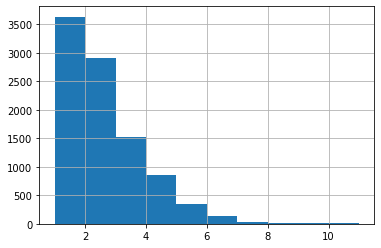

In [55]:
# Transaction分布
df.Transaction.value_counts().hist();

In [58]:
# 将Transaction设为index
df = df.set_index('Transaction')
df.head()

,Date,Time,Item
Transaction,,,
1,2016-10-30,09:58:11,bread
2,2016-10-30,10:05:34,scandinavian
2,2016-10-30,10:05:34,scandinavian
3,2016-10-30,10:07:57,hot chocolate
3,2016-10-30,10:07:57,jam


In [63]:
# 获得购物清单数据
orders_series = df.Item
orders_series[:5]

Transaction
1            bread
2     scandinavian
2     scandinavian
3    hot chocolate
3              jam
Name: Item, dtype: object

In [108]:
# 将数据集进行格式转换
# 每笔订单为一个集合，去掉订单中的重复项

transactions = [] # transaction：订单数组
temp_index = 0
for i, v in orders_series.items():
    if i != temp_index:     
        temp_set = set()        
        temp_set.add(v)
        transactions.append(temp_set)
        
        # 更新temp_index
        temp_index = i   
    else:
        temp_set.add(v)

In [111]:
transactions[:3]

[{'bread'}, {'scandinavian'}, {'cookies', 'hot chocolate', 'jam'}]

In [132]:
itemsets, rules = apriori(transactions, min_support=0.02,  min_confidence=0.5)
pd.DataFrame(itemsets)
# itemsets.sort_values(by="support" , ascending=False) 
itemsets

{1: {('bread',): 3097,
  ('scandinavian',): 275,
  ('hot chocolate',): 552,
  ('cookies',): 515,
  ('muffin',): 364,
  ('pastry',): 815,
  ('coffee',): 4528,
  ('medialuna',): 585,
  ('tea',): 1350,
  ('farm house',): 371,
  ('juice',): 365,
  ('soup',): 326,
  ('cake',): 983,
  ('sandwich',): 680,
  ('alfajores',): 344,
  ('brownie',): 379,
  ('truffles',): 192,
  ('toast',): 318,
  ('scone',): 327},
 2: {('bread', 'coffee'): 852,
  ('bread', 'pastry'): 276,
  ('coffee', 'pastry'): 450,
  ('coffee', 'medialuna'): 333,
  ('coffee', 'tea'): 472,
  ('bread', 'tea'): 266,
  ('coffee', 'juice'): 195,
  ('coffee', 'hot chocolate'): 280,
  ('coffee', 'cookies'): 267,
  ('cake', 'coffee'): 518,
  ('cake', 'tea'): 225,
  ('bread', 'cake'): 221,
  ('coffee', 'sandwich'): 362,
  ('coffee', 'toast'): 224}}

In [128]:
print('关联规则：')
rules

关联规则：


[{pastry} -> {coffee},
 {medialuna} -> {coffee},
 {juice} -> {coffee},
 {hot chocolate} -> {coffee},
 {cookies} -> {coffee},
 {cake} -> {coffee},
 {sandwich} -> {coffee},
 {toast} -> {coffee}]

To be Continued